In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_163.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_330.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_498.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_167.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_76.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_439.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_226.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_168.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_96.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_64.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_373.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_115.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_20.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_559.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

2024-03-29 13:13:44.506355: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 13:13:44.506485: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 13:13:44.657698: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
path = '/kaggle/input/yawn-eye-dataset-new/dataset_new'
print(os.listdir(path))

['test', 'train']


In [3]:
train_path = path + '/train'
test_path = path + '/test'

In [4]:
train_classes = os.listdir(train_path)
print(train_classes)
test_classes = os.listdir(test_path)
print(test_classes)

['Closed', 'Open', 'yawn', 'no_yawn']
['Closed', 'Open', 'yawn', 'no_yawn']


In [6]:
img_size = 224
no_channel = 3

In [7]:
X_tr = []
y_tr = []
for label in train_classes:
    data_path = os.path.join(train_path, label)
    class_num = train_classes.index(label)
    for img in os.listdir(data_path):
            try:
                img_arr = cv2.imread(os.path.join(data_path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                X_tr.append(resized_arr)
                y_tr.append(class_num)
            except Exception as e:
                print(e)

In [8]:
X_tr = np.asarray(X_tr)
X_tr = X_tr/255
y_tr = np.asarray(y_tr)
y_tr = to_categorical(y_tr)

In [9]:
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size = 0.2, random_state = 1)

In [10]:
X_test = []
y_test = []
for label in test_classes:
    data_path = os.path.join(test_path, label)
    class_num = test_classes.index(label)
    for img in os.listdir(data_path):
            try:
                img_arr = cv2.imread(os.path.join(data_path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                X_test.append(resized_arr)
                y_test.append(class_num)
            except Exception as e:
                print(e)

In [11]:
X_test = np.asarray(X_test)
X_test = X_test/255
y_test = np.asarray(y_test)
y_test = to_categorical(y_test)

In [12]:
print('X training shape :', X_tr.shape)
print('y training shape :', y_tr.shape)
print('X validation shape :', X_val.shape)
print('y validation shape :', y_val.shape)
print('X testing shape :', X_test.shape)
print('y testing shape :', y_test.shape)

X training shape : (1973, 224, 224, 3)
y training shape : (1973, 4)
X validation shape : (494, 224, 224, 3)
y validation shape : (494, 4)
X testing shape : (433, 224, 224, 3)
y testing shape : (433, 4)


In [13]:
model_VGG16 = VGG16(include_top = False, input_shape = (img_size, img_size, no_channel), weights = 'imagenet')

for layer in model_VGG16.layers:
  layer.trainable = False

inp = model_VGG16.input
x = model_VGG16.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(4, activation='softmax')(x)

model = Model(inputs = inp, outputs = out)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,02

 Total params: 41,062,980 (156.64 MB)

 Trainable params: 26,348,292 (100.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
epochs = 50

In [19]:
hist = model.fit(X_tr,
                 y_tr,
                 epochs = 50,
                 validation_data = (X_val, y_val))

Epoch 1/50
 1/62 ━━━━━━━━━━━━━━━━━━━━ 34:11 34s/step - accuracy: 0.2500 - loss: 1.5754

I0000 00:00:1711718576.875786      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711718576.899191      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.5560 - loss: 2.0341

W0000 00:00:1711718609.542993      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711718611.406505      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


62/62 ━━━━━━━━━━━━━━━━━━━━ 86s 854ms/step - accuracy: 0.5581 - loss: 2.0197 - val_accuracy: 0.8421 - val_loss: 0.3102
Epoch 2/50


W0000 00:00:1711718629.054714      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.8555 - loss: 0.3077 - val_accuracy: 0.8765 - val_loss: 0.2616
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.9128 - loss: 0.1990 - val_accuracy: 0.9211 - val_loss: 0.1857
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9564 - loss: 0.1170 - val_accuracy: 0.8563 - val_loss: 0.4596
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.9410 - loss: 0.1679 - val_accuracy: 0.9332 - val_loss: 0.1851
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9670 - loss: 0.0979 - val_accuracy: 0.9413 - val_loss: 0.2172
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9772 - loss: 0.0631 - val_accuracy: 0.9615 - val_loss: 0.1016
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9801 - loss: 0.0658 - val_accuracy: 0.9514 - val_loss: 0.2128
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9804 - loss: 0.0642 - val_accuracy: 0.884

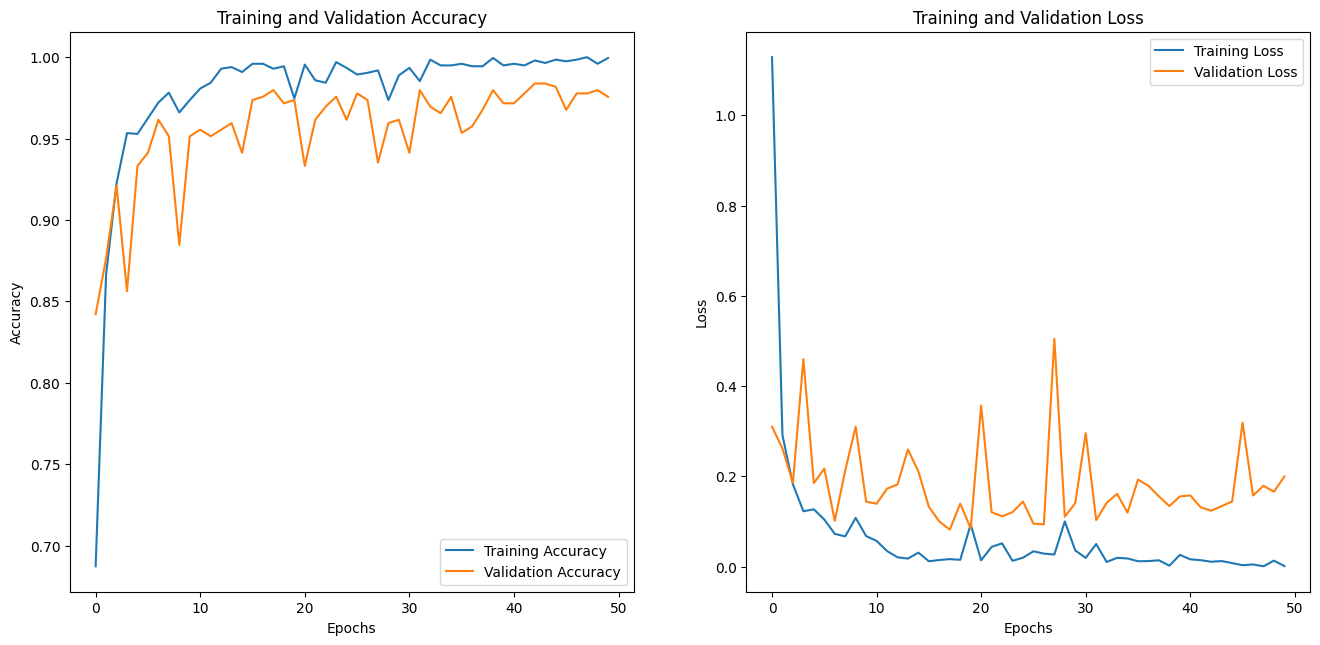

In [20]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (16, 16))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [21]:
pred_X = model.predict(X_test)
y_pred = np.argmax(pred_X, axis = 1)
y_test = np.argmax(y_test, axis = 1)

 2/14 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step

W0000 00:00:1711719263.458244      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step 


W0000 00:00:1711719284.466037      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Text(0.5, 1.0, 'CNN Confusion Matrix')

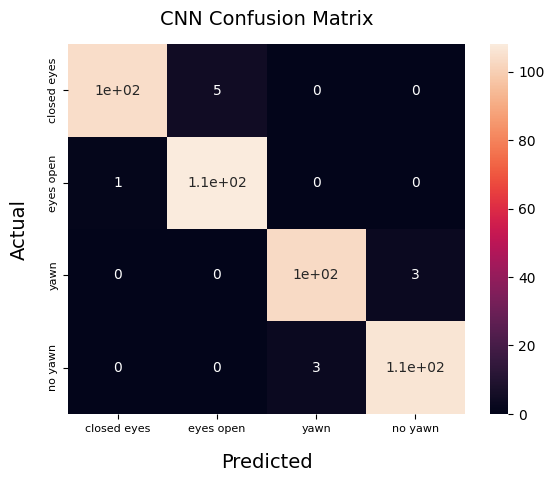

In [22]:
cm = confusion_matrix(y_test, y_pred)
hm = sns.heatmap(cm, annot = True)
hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
hm.xaxis.set_ticklabels(['closed eyes', 'eyes open', 'yawn', 'no yawn'], fontsize = 8)
hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
hm.yaxis.set_ticklabels(['closed eyes', 'eyes open', 'yawn', 'no yawn'], fontsize = 8)
hm.set_title("CNN Confusion Matrix", fontsize = 14, pad = 14)

In [23]:
print(classification_report(y_test, y_pred, target_names = ['closed eyes', 'eyes open', 'yawn', 'no yawn']))

              precision    recall  f1-score   support

 closed eyes       0.99      0.95      0.97       109
   eyes open       0.96      0.99      0.97       109
        yawn       0.97      0.97      0.97       106
     no yawn       0.97      0.97      0.97       109

    accuracy                           0.97       433
   macro avg       0.97      0.97      0.97       433
weighted avg       0.97      0.97      0.97       433



In [24]:
import cv2

def preprocess_image(image_path, img_size):
    # Read the image
    img = cv2.imread(image_path)
    
    # Resize the image
    img = cv2.resize(img, (img_size, img_size))
    
    # Convert to RGB (if not already in RGB format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Normalize pixel values
    img = img / 255.0
    
    return img

# Example usage:
image_path = "/kaggle/input/testing-dataset/awake girl.jpg"  # Replace with the path to your image file
preprocessed_image = preprocess_image(image_path, img_size)


In [25]:
predictions = model.predict(np.expand_dims(preprocessed_image, axis=0))

# Interpret the results
predicted_class = np.argmax(predictions)
predicted_class_name = train_classes[predicted_class]

# Check if predicted class is "Open" or "No Yawn"
if predicted_class_name.lower() == "open" or predicted_class_name.lower() == "no yawn":
    print("Awake")
else:
    print("Drowsy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Awake
